In [2]:
import network

Using Theano backend.
Using gpu device 0: Tesla K40m (CNMeM is disabled, cuDNN 5004)


In [14]:
from keras.utils.visualize_util import model_to_dot, plot
from IPython.display import SVG
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import random

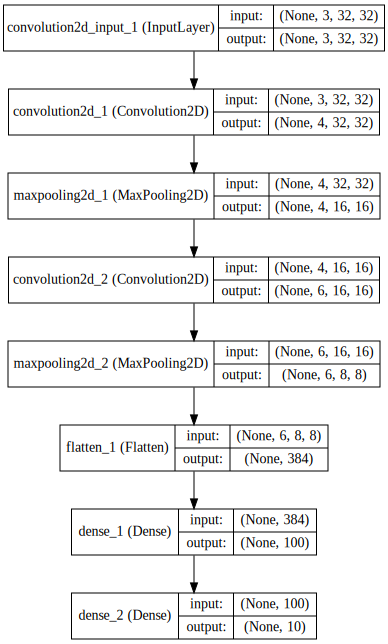

In [4]:
lenet = network.lenet()

SVG(model_to_dot(lenet, show_shapes=True).create(prog='dot', format='svg'))

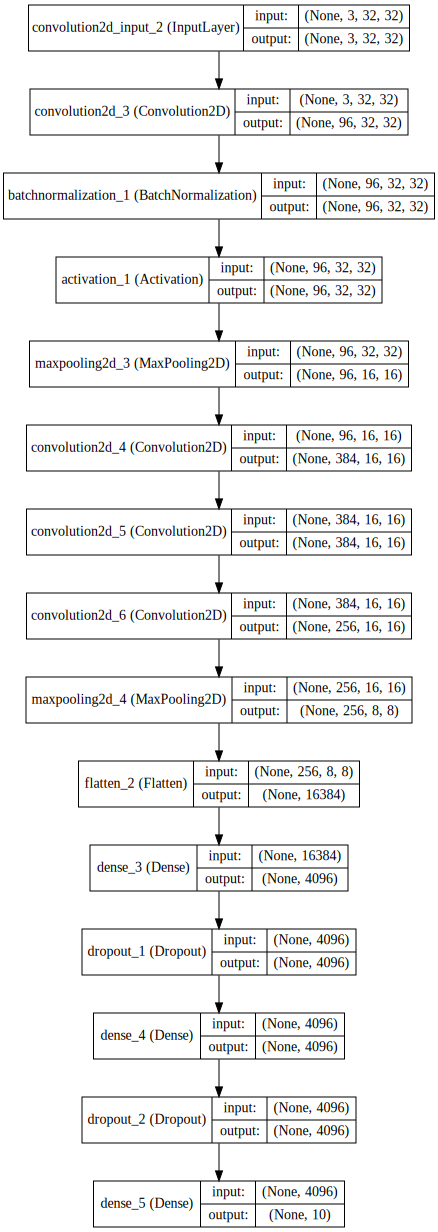

In [5]:
alexnet = network.alexnet()

SVG(model_to_dot(alexnet, show_shapes=True).create(prog='dot', format='svg'))

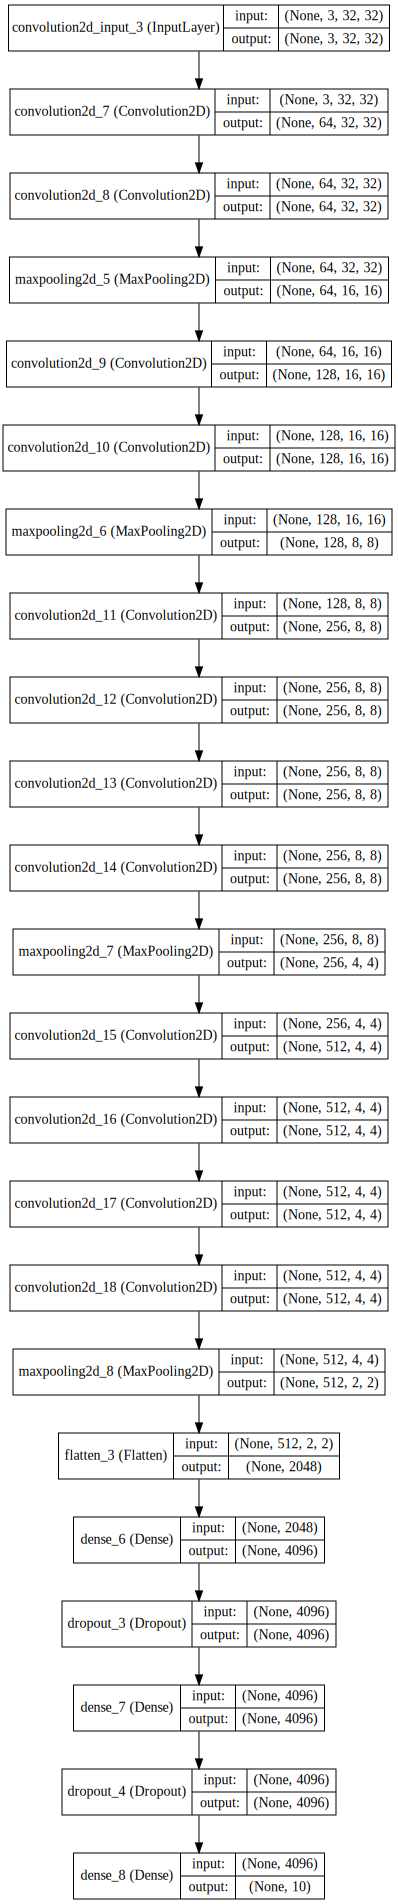

In [6]:
vggnet = network.vggnet()

SVG(model_to_dot(vggnet, show_shapes=True).create(prog='dot', format='svg'))

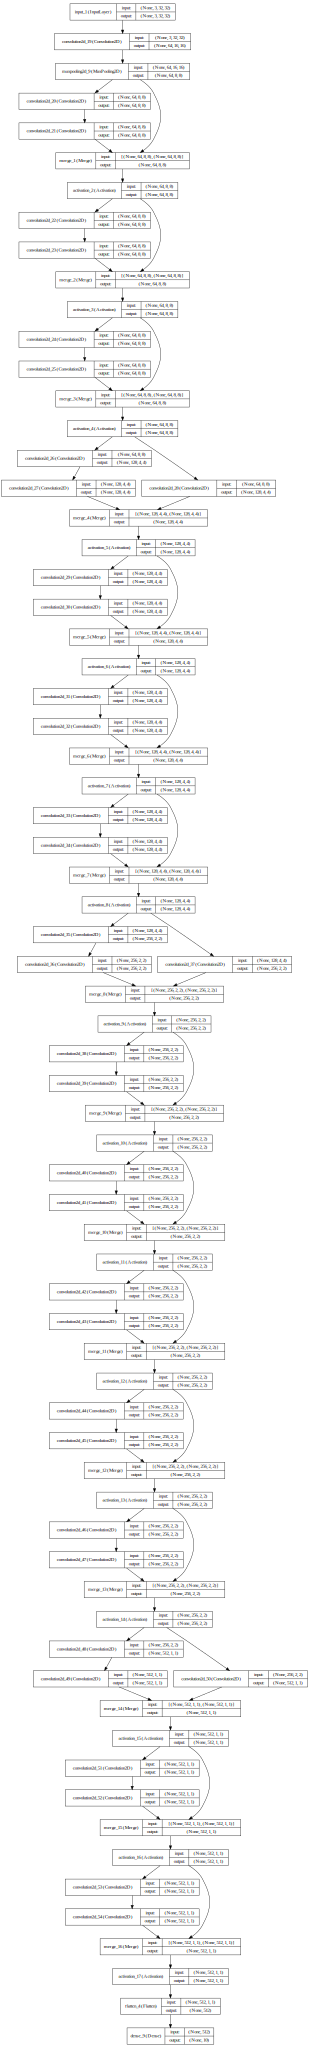

In [7]:
resnet = network.resnet()

SVG(model_to_dot(resnet, show_shapes=True).create(prog='dot', format='svg'))

In [10]:
from keras.datasets import cifar10

batch_size = 128
nb_epoch = 50

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

early_stop = EarlyStopping(patience=2)

In [11]:
random.seed(1405)
lenet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lehis = lenet.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s - loss: 1.6270 - acc: 0.4669 - val_loss: 1.6115 - val_acc: 0.4631
Epoch 2/100
50000/50000 [==============================] - 3s - loss: 1.5949 - acc: 0.4721 - val_loss: 1.6454 - val_acc: 0.4494
Epoch 3/100
50000/50000 [==============================] - 3s - loss: 1.6342 - acc: 0.4536 - val_loss: 1.5960 - val_acc: 0.4610
Epoch 4/100
50000/50000 [==============================] - 3s - loss: 1.6024 - acc: 0.4652 - val_loss: 1.5850 - val_acc: 0.4550
Epoch 5/100
50000/50000 [==============================] - 3s - loss: 1.6815 - acc: 0.4275 - val_loss: 1.6952 - val_acc: 0.4258
Epoch 6/100
50000/50000 [==============================] - 3s - loss: 1.6162 - acc: 0.4510 - val_loss: 1.6241 - val_acc: 0.4483
Epoch 7/100
50000/50000 [==============================] - 3s - loss: 1.6085 - acc: 0.4501 - val_loss: 1.6283 - val_acc: 0.4519


In [12]:
random.seed(1405)
alexnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
alexhis = alexnet.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 6784/50000 [===>..........................] - ETA: 401s - loss: 14.3289 - acc: 0.0982

KeyboardInterrupt: 

In [ ]:
random.seed(1405)
vggnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
vgghis = vggnet.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test))

In [13]:
random.seed(1405)
resnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
reshis = resnet.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 327s - loss: 1.9597 - acc: 0.2808 - val_loss: 1.6930 - val_acc: 0.3820


In [ ]:
x = range(nb_epoch)
plt.plot(x, lehis.history['acc'], label="LeNet train")
plt.plot(x, lehis.history['val_acc'], label="LeNet val")
plt.plot(x, alexhis.history['acc'], label="AlexNet train")
plt.plot(x, alexhis.history['val_acc'], label="AlexNet val")
plt.plot(x, vgghis.history['acc'], label="VGGNet train")
plt.plot(x, vgghis.history['val_acc'], label="VGGNet val")
plt.plot(x, reshis.history['acc'], label="ResNet train")
plt.plot(x, reshis.history['val_acc'], label="ResNet val")
plt.title("accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, lehis.history['loss'], label="LeNet train")
plt.plot(x, lehis.history['val_loss'], label="LeNet val")
plt.plot(x, alexhis.history['loss'], label="AlexNet train")
plt.plot(x, alexhis.history['val_loss'], label="AlexNet val")
plt.plot(x, vgghis.history['loss'], label="VGGNet train")
plt.plot(x, vgghis.history['val_loss'], label="VGGNet val")
plt.plot(x, reshis.history['loss'], label="ResNet train")
plt.plot(x, reshis.history['val_loss'], label="ResNet val")
plt.title("loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()